In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("eko_zboża.csv", sep=";")
df

,Rok,Jeczmien,Pszenica i orkisz,Zboza
0,2012,4 702,11 368,102 455
1,2013,3 746,12 052,117 501
2,2014,4 021,15 935,131 863
3,2015,4 742,17 313,135 237
4,2016,5 241,18 671,151 311
5,2017,5 299,17 645,175 963
6,2018,5 111,17 320,195 921
7,2019,5 428,27 828,271 901
8,2020,5 929,40 953,315 269
9,2021,4 895,56 577,296 367


In [3]:
df.columns = ['Rok', 'Jeczmien', 'Pszenica_i_orkisz', 'Zboza']
df['Rok'] = df['Rok'].astype(int)
for col in ['Jeczmien', 'Pszenica_i_orkisz', 'Zboza']:
    df[col] = df[col].str.replace(' ', '').astype(int)

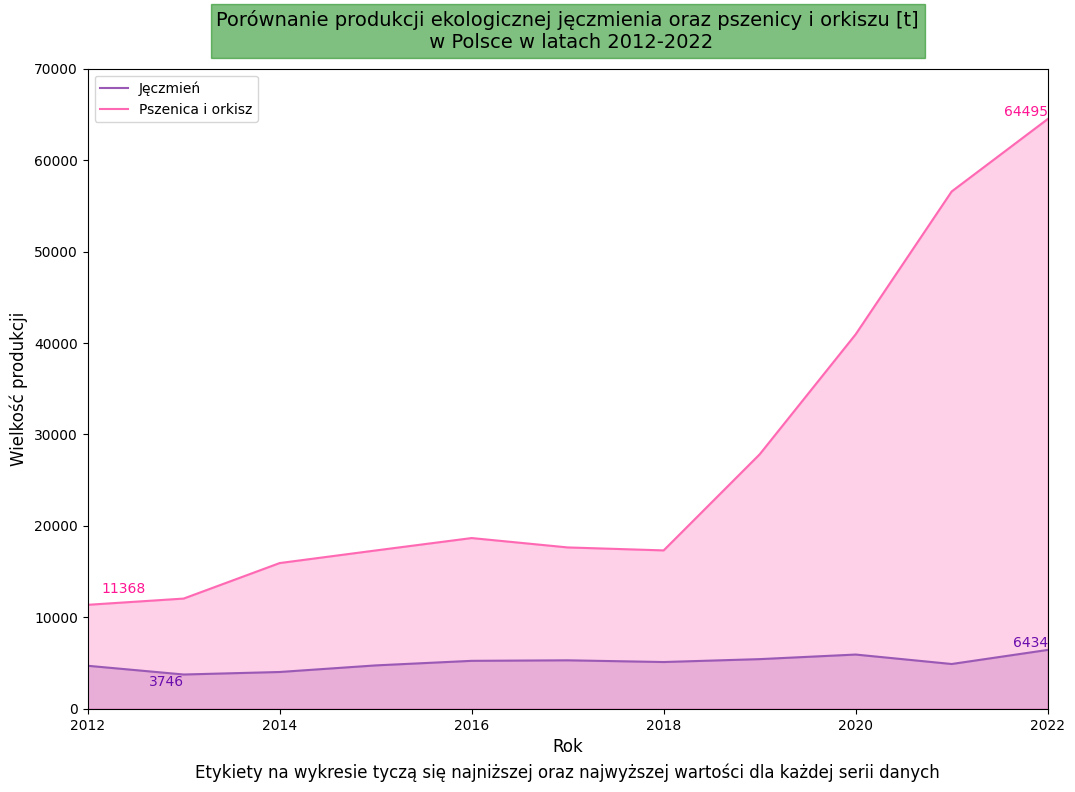

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter



df = pd.read_csv('eko_zboża.csv', sep=';')
df.columns = ['Rok', 'Jeczmien', 'Pszenica_i_orkisz','Zboza']
for col in ['Jeczmien', 'Pszenica_i_orkisz']:
    df[col] = df[col].str.replace(' ', '').astype(int)

x = df['Rok'].values
y1 = df['Jeczmien'].values
y2 = df['Pszenica_i_orkisz'].values

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 70000)
ax.set_xlabel("Rok", fontsize=12)
ax.set_ylabel("Wielkość produkcji", fontsize=12)
ax.set_title("Porównanie produkcji ekologicznej jęczmienia oraz pszenicy i orkiszu [t]\n w Polsce w latach 2012-2022", fontsize=14,
             bbox={'color':'green','alpha':0.5,},
             pad=15)

line1, = ax.plot([], [], color='#9b59b6', label='Jęczmień')
line2, = ax.plot([], [], color='#ff69b4', label='Pszenica i orkisz')
ax.legend(loc="upper left")
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
fig.text(0.5, 0.02, "Etykiety na wykresie tyczą się najniższej oraz najwyższej wartości dla każdej serii danych", ha='center', va='center', fontsize=12)
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

pause_frames=14
total_frames=len(x) + pause_frames



def update(frame):
    line1.set_data(x[:frame+1], y1[:frame+1])
    line2.set_data(x[:frame+1], y2[:frame+1])

    for collection in ax.collections:
        collection.remove()

    ax.fill_between(x[:frame+1], y1[:frame+1], color='#9b59b6', alpha=0.3)
    ax.fill_between(x[:frame+1], y2[:frame+1], color='#ff69b4', alpha=0.3)
    if frame == len(x) - 1:
        max_y1 = y1.max()
        min_y1 = y1.min()
        max_x1 = x[y1.argmax()]
        min_x1 = x[y1.argmin()]

        ax.text(max_x1, max_y1, f'{max_y1}', color='#6a0dad', fontsize=10, ha='right', va='bottom')
        ax.text(min_x1, min_y1, f'{min_y1}', color='#6a0dad', fontsize=10, ha='right', va='top')

        max_y2 = y2.max()
        min_y2 = y2.min()
        max_x2 = x[y2.argmax()]
        min_x2 = x[y2.argmin()]

        ax.text(max_x2, max_y2, f'{max_y2}', color='#ff1493', fontsize=10, ha='right', va='bottom')
        ax.text(min_x2 + 0.6, min_y2 +2500, f'{min_y2}', color='#ff1493', fontsize=10, ha='right', va='top')

        if frame >= len(x):
          return line1, line2
    return line1, line2

ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, interval=500, blit=False, repeat=True)

ani.save('wykres14.gif', writer=PillowWriter(fps=2),dpi=80)

plt.show()
